In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import json
import pickle
import pandas as pd

C:\Users\user\anaconda3_2\envs\aml\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
import os 
path = os.getcwd()
df1 = pd.read_csv(path + r"\spotify_data\output_with_genres.csv")
print(df1.shape)
df1.head()

(7457, 21)


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Genre
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,"['corrido', 'corridos tumbados', 'sad sierreno..."
1,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,"['reggaeton', 'trap latino', 'urbano latino']"
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,"['reggaeton', 'urbano mexicano']"
3,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.0,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,['k-pop girl group']
4,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.0,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,['musica chihuahuense']


In [ ]:
# Drop rows with empty genres
df1['Genre'] = df1['Genre'].apply(eval)  # Convert stringified lists back to lists
df1 = df1[df1['Genre'].apply(len) > 0]  # Keep rows with genres
print(df1.shape)
# Keep only the first genre for each song
df1['Genre'] = df1['Genre'].apply(lambda x: x[0] if x else None)
df1.head()

(7391, 21)


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Genre
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,corrido
1,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,reggaeton
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,reggaeton
3,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.0,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,k-pop girl group
4,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.0,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,musica chihuahuense


In [ ]:
print(df1['Genre'].value_counts())
unique = df1['Genre'].unique()
to_remove = [] 
# Genres that have lower samples will be placed within the to_remove array
for genre in unique:
    if df1['Genre'].value_counts()[genre] < 20: 
        to_remove += [genre]
len(to_remove)
print(df1.drop_duplicates(subset = 'Title').shape)
print(df1["Genre"].nunique())

Genre
pop                       887
atl hip hop               447
hip hop                   357
dance pop                 354
reggaeton                 255
                         ... 
balochi pop                 1
eau claire indie            1
southern hip hop            1
reggaeton colombiano        1
swedish tropical house      1
Name: count, Length: 415, dtype: int64
(7391, 21)
415


In [ ]:
df1 = df1[~df1['Genre'].isin(['polish drill', 'paevia', 'turkce drill', 'tollywood', 'deboxe', 'drill francais'])]
all_genres = df1['Genre'].unique()
print(all_genres)
# Display unique genres
unique_genres_list = list(set(f"{genre} music" for genre in all_genres))

# Save the unique genres to a list
print("Unique genres with 'music':", unique_genres_list)

['corrido' 'reggaeton' 'k-pop girl group' 'musica chihuahuense' 'pop'
 'gen z singer-songwriter' 'colombian pop' 'afrobeats' 'rap'
 'canadian contemporary r&b' 'florida drill' 'hip hop'
 'contemporary country' 'garage rock' 'chicago drill' 'latin hip hop'
 'bedroom pop' 'art pop' 'big room' 'corridos tumbados' 'piano rock'
 'dance pop' 'europop' 'chill pop' 'modern indie pop' 'k-pop'
 'permanent wave' 'argentine hip hop' 'puerto rican pop' 'sad sierreno'
 'trap boricua' 'detroit hip hop' 'gauze pop' 'modern alternative rock'
 'conscious hip hop' 'indonesian pop' 'alt z' 'banda' 'modern rock'
 'australian hip hop' 'latin pop' 'toronto indie' 'uk contemporary r&b'
 'anime' 'british soul' 'dfw rap' 'r&b' 'brostep' 'boy band' 'glam rock'
 'j-pop' 'new jersey underground rap' 'canadian hip hop' 'trap argentino'
 'folk-pop' 'afrofuturism' 'filmi' 'new romantic' 'neo mellow'
 'canadian pop' 'pop rap' 'trap brasileiro' 'ambient pop' 'agronejo'
 'baroque pop' 'viral pop' 'pov: indie' 'barbadian

In [6]:
# Initialize the Sentence-BERT model for genre embeddings
model = SentenceTransformer('all-mpnet-base-v2')

# Generate embeddings for each genre
genre_embeddings = model.encode(unique_genres_list)

In [55]:
similarity = model.similarity(genre_embeddings, genre_embeddings)
print(similarity)

tensor([[1.0000, 0.4559, 0.4132,  ..., 0.4678, 0.4129, 0.5052],
        [0.4559, 1.0000, 0.3421,  ..., 0.5093, 0.2148, 0.4566],
        [0.4132, 0.3421, 1.0000,  ..., 0.4381, 0.3887, 0.6721],
        ...,
        [0.4678, 0.5093, 0.4381,  ..., 1.0000, 0.3152, 0.4221],
        [0.4129, 0.2148, 0.3887,  ..., 0.3152, 1.0000, 0.4342],
        [0.5052, 0.4566, 0.6721,  ..., 0.4221, 0.4342, 1.0000]])


## AUTOMATIC CLUSTER SEARCH

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Function to compute clustering metrics over a range of cluster numbers
def evaluate_clustering_metrics(embeddings, max_clusters=30):
    metrics = {
        "Num_Clusters": [],
        "Silhouette_Score": [],
        "Calinski_Harabasz_Index": [],
        "Davies_Bouldin_Index": []
    }

    for n_clusters in range(2, max_clusters + 1):
        # Perform clustering
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
        cluster_assignments = hierarchical.fit_predict(embeddings)
        
        # Compute metrics
        sil_score = silhouette_score(embeddings, cluster_assignments)
        ch_score = calinski_harabasz_score(embeddings, cluster_assignments)
        db_score = davies_bouldin_score(embeddings, cluster_assignments)
        
        # Store metrics
        metrics["Num_Clusters"].append(n_clusters)
        metrics["Silhouette_Score"].append(sil_score)
        metrics["Calinski_Harabasz_Index"].append(ch_score)
        metrics["Davies_Bouldin_Index"].append(db_score)

    return pd.DataFrame(metrics)

# Evaluate metrics over a range of cluster numbers
metrics_df = evaluate_clustering_metrics(reduced_embeddings, max_clusters=30)

# Plots for visualization of the metrics
plt.figure(figsize=(12, 6))
plt.plot(metrics_df["Num_Clusters"], metrics_df["Silhouette_Score"], label="Silhouette Score", marker="o")
plt.plot(metrics_df["Num_Clusters"], metrics_df["Davies_Bouldin_Index"], label="Davies-Bouldin Index", marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Clustering Metrics vs Number of Clusters")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(metrics_df["Num_Clusters"], metrics_df["Calinski_Harabasz_Index"], label="Calinski-Harabasz Index", marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index vs Number of Clusters")
plt.grid()
plt.legend()
plt.show()


NameError: name 'reduced_embeddings' is not defined

Best number of clusters based on Silhouette score: 3
New Silhouette Score: 0.4336908161640167


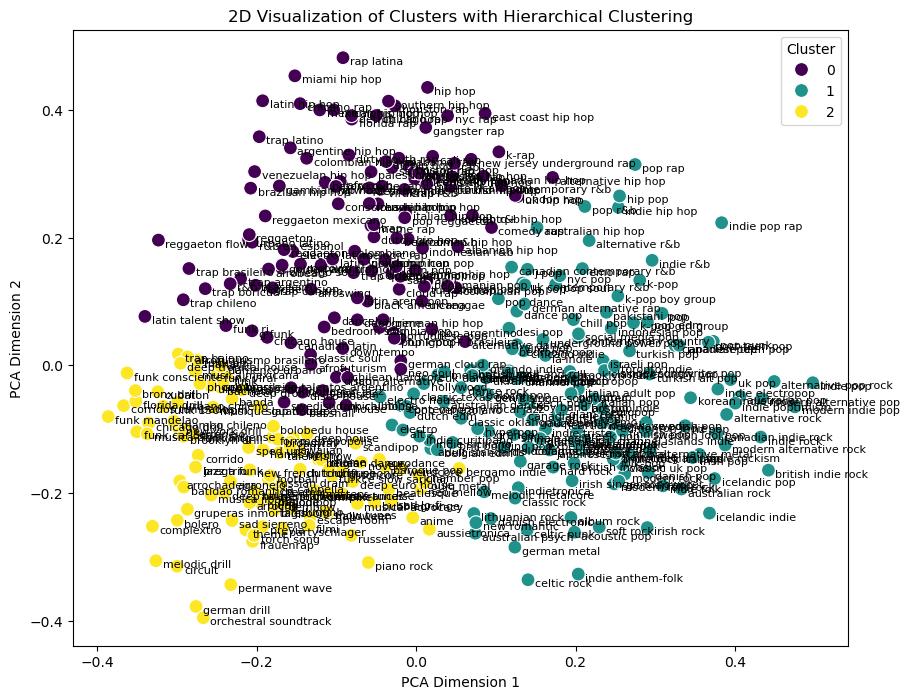

Genre-to-parent-genre mapping with numerical parent genres has been saved to 'genre_to_parent_genre_mapping.csv'.


In [ ]:
import csv
# Function to evaluate Silhouette score for different cluster numbers
reduce_tech = 'pca'
def evaluate_silhouette(genre_embeddings, max_clusters=30):
  silhouettes = []
  for n_clusters in range(2, max_clusters + 1):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    cluster_assignments = hierarchical.fit_predict(genre_embeddings)
    sil_score = silhouette_score(genre_embeddings, cluster_assignments)
    silhouettes.append((n_clusters, sil_score))
  return silhouettes

# PCA for dimensionality reduction
if reduce_tech == 'pca':
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(genre_embeddings)
# umap for dimensionality reduction
elif reduce_tech == "umap":
    umap_reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42)
    reduced_embeddings = umap_reducer.fit_transform(genre_embeddings)
# tsne for dimensionality reduction
else:
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced_embeddings = tsne.fit_transform(genre_embeddings)

# Evaluate silhouette scores for different cluster numbers
silhouettes = evaluate_silhouette(reduced_embeddings)

# Find the cluster number with the highest silhouette score
best_n_clusters, best_sil_score = max(silhouettes, key=lambda x: x[1])

print(f"Best number of clusters based on Silhouette score: {best_n_clusters}")

# Perform hierarchical clustering with the best number of clusters
hierarchical = AgglomerativeClustering(n_clusters=best_n_clusters, linkage="ward")
cluster_assignments = hierarchical.fit_predict(reduced_embeddings)

# We calculate silhouette score
sil_score = silhouette_score(reduced_embeddings, cluster_assignments)
print(f"New Silhouette Score: {sil_score}")

# Visualization of the Clusters (2D for simplicity)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=cluster_assignments, palette="viridis", s=100)
plt.title("2D Visualization of Clusters with Hierarchical Clustering")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

for i, point in enumerate(reduced_embeddings):
  plt.annotate(unique_genres_list[i][:-6], (point[0], point[1]), xytext=(5, -5),  
               textcoords='offset points', fontsize=8)
plt.legend(title='Cluster')
plt.savefig("genre_clusters.pdf", bbox_inches="tight")
plt.show()

# Assigning clusters to target genres
cleaned_genre_to_target = {}
for genre, cluster in zip(unique_genres_list, cluster_assignments):
    cleaned_genre = genre.replace(" music", "").strip()  # Remove " music" and extra whitespace
    cleaned_genre_to_target[cleaned_genre] = cluster

cluster_genres = {}
for genre, cluster in zip(unique_genres_list, cluster_assignments):
    cluster_genres.setdefault(cluster, []).append(genre)

# Write to a JSON file
# Write to a pickle file
with open('my_genre_dict.pkl', 'wb') as f:
    pickle.dump(genre_to_target, f)
    genre_to_target = {genre: cluster for genre, cluster in zip(unique_genres_list, cluster_assignments)}
# Save the mapping to a CSV file
with open('genre_to_parent_genre_mapping.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Gnere', 'Parent Genre'])  
    for genre, parent_genre in cleaned_genre_to_target.items():
        writer.writerow([genre, parent_genre])  

print("Genre-to-parent-genre mapping with numerical parent genres has been saved to 'genre_to_parent_genre_mapping.csv'.")

In [ ]:

# Calculating adjusted rand index or normalized mutual information
auto_mapping_df = pd.read_csv(path + r"\spotify_data\parent_genre_embed.csv") # embedding based genre mapping
manual_mapping_df = pd.read_csv(path + r"\spotify_data\parent_genre_manual.csv") # manuel genre mapping

# mapping from string labels to integers
unique_labels = manual_mapping_df['Parent Genre'].unique()
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Labels to integers
manual_mapping_df['manual_label_numeric'] = manual_mapping_df['Parent Genre'].map(label_mapping)

# Mapping dictionary from the mapping file
genre_mapping_manual = dict(zip(manual_mapping_df['Genre'], manual_mapping_df['manual_label_numeric']))
genre_mapping_auto = dict(zip(auto_mapping_df['Genre'], auto_mapping_df['Parent Genre']))


from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

manual_labels = df_transformed['Genre'].map(genre_mapping_manual)
auto_labels = df_transformed['Genre'].map(genre_mapping_auto)

# Compute ARI
ari_score = adjusted_rand_score(manual_labels, auto_labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")

# Compute NMI
nmi_score = normalized_mutual_info_score(manual_labels, auto_labels)
print(f"Normalized Mutual Information (NMI): {nmi_score}")
